In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.python.keras import backend as K
os.environ["CUDA_VISIBLE_DEVICES"] = "2,3"
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
# Set up the tensorflow session as same as the keras session
K.set_session(sess)

In [6]:
# Design the network architecture using Keras
# downconv + flatconv + downconv + flatconv + flatconv + upconv + flatconv + upconv + flatconv + flatconv
from tensorflow.python.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.python.keras.models import Model

inputs = Input(shape=(256, 256, 3))
x = Conv2D(32, (3, 3), strides=(2,2), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(64, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = Conv2DTranspose(64, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = Conv2DTranspose(32, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
outputs = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
model =Model(inputs, outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 128, 64)      36928     
__________

In [3]:
# Import the dataset
import pickle
with open('dataset', 'rb') as file:
    train_images, train_outputs = pickle.load(file)
print('Dataset dimensions', train_images.shape, train_outputs.shape)
# Normalize the pixel values
train_images = train_images.astype('float32') / 255
train_outputs = train_outputs.astype('float32') / 255

Dataset dimensions (308, 256, 256, 3) (308, 256, 256, 3)


In [4]:
from matplotlib import pyplot as plt
def evaluate(trained_model, real_image, expected_image):
    """Evaluate the model output for 'real_image' as the input.
    Also, display display all the images side by side"""
    test_input = np.expand_dims(real_image, 0)
    pred_output = trained_model.predict(test_input)
    f, axarr = plt.subplots(1,3, figsize=(12,12))
    axarr[0].imshow(real_image, interpolation='bilinear')
    axarr[0].set_title('Real image')
    axarr[1].imshow(pred_output[0], interpolation='bilinear')
    axarr[1].set_title('Model output')
    axarr[2].imshow(expected_image, interpolation='bilinear')
    axarr[2].set_title('Program output')
    plt.show()

Start of training


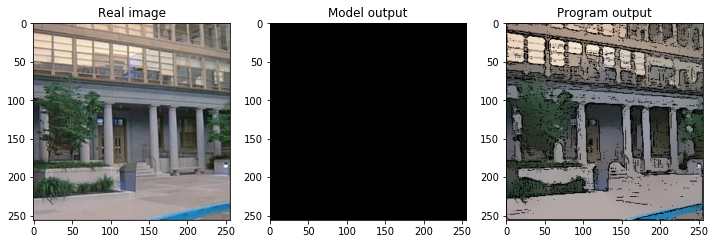

Epoch 1/1
 29/306 [=>............................] - ETA: 3:07 - loss: 0.1080

KeyboardInterrupt: 

In [5]:
# Train the model for 50 epochs with all the images in the dataset except
# the last 2
model.fit(train_images[:-2], train_outputs[:-2], epochs=50, batch_size=16)
model.save('trained_model')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


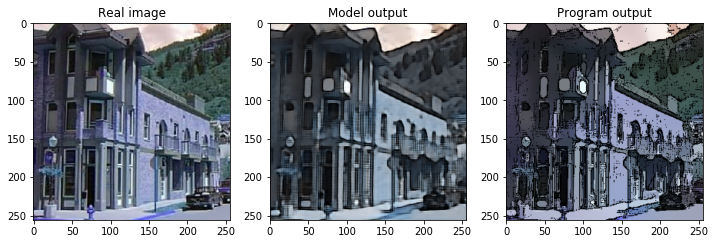

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


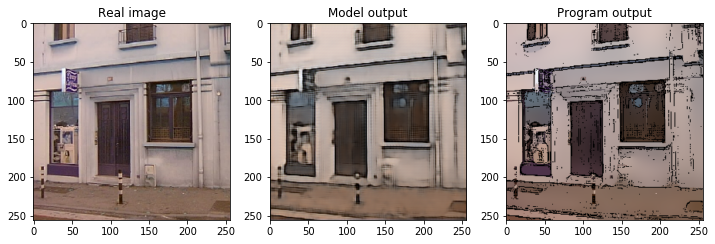

In [19]:
# Train the model on a gpu and load the trained model
from tensorflow.python.keras.models import load_model
trained_model = load_model('trained_model')
evaluate(trained_model, train_images[-2], train_outputs[-2])
evaluate(trained_model, train_images[-1], train_outputs[-1])